In [1]:
!nvidia-smi

Wed Mar 20 07:57:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 821.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
from datasets import load_dataset

data = load_dataset("DOHUN99/mechuri")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [4]:
data

DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output'],
        num_rows: 616
    })
})

In [5]:
data = data.map(
    lambda x: {'text': f"### 질문: {x['instruction']}\n\n### 답변: {x['output']}<|endoftext|>" }
)

Map:   0%|          | 0/616 [00:00<?, ? examples/s]

In [7]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_id = "beomi/KoAlpaca-Polyglot-5.8B"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map={"":0})

tokenizer_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

model-00001-of-00013.safetensors:   0%|          | 0.00/926M [00:00<?, ?B/s]

model-00002-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00003-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00004-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00005-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00006-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00007-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00008-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00009-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00010-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00011-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00012-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00013-of-00013.safetensors:   0%|          | 0.00/515M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/13 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [8]:
data = data.map(lambda samples: tokenizer(samples["text"]), batched=True)

Map:   0%|          | 0/616 [00:00<?, ? examples/s]

In [9]:
data['train'][0]['text']

'### 질문: 삼계탕은 어떤 재료로 만드나요?\n\n### 답변: 삼계탕은 닭고기, 대추, 밤, 마늘, 생강 등을 사용하여 맑은 육수에 닭을 삶아내고 고사리, 참나물, 콩나물 등을 함께 끓여 닭 육수의 맛을 내는 건강을 도와주는 전통 요리입니다.<|endoftext|>'

In [10]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [11]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [12]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["query_key_value"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 3670016 || all params: 3070156800 || trainable%: 0.11953838970048696


In [13]:
import transformers

# needed for gpt-neo-x tokenizer
tokenizer.pad_token = tokenizer.eos_token

trainer = transformers.Trainer(
    model=model,
    train_dataset=data["train"],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=8,
        gradient_accumulation_steps=1,
        max_steps=770,
        learning_rate=1e-4,
        fp16=True,
        logging_steps=10,
        logging_dir="./logs",
        output_dir="outputs",
        # optim="paged_adamw_8bit"
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)
model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss
10,2.971200
20,2.204500
30,1.967100
40,1.720200
50,1.678500
60,1.637100
70,1.536700
80,1.376400
90,1.442500
100,1.310300


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


TrainOutput(global_step=770, training_loss=1.0555498816750266, metrics={'train_runtime': 2896.1215, 'train_samples_per_second': 2.127, 'train_steps_per_second': 0.266, 'total_flos': 3.766223080390656e+16, 'train_loss': 1.0555498816750266, 'epoch': 10.0})

In [14]:
model.eval()
model.config.use_cache = True  # silence the warnings. Please re-enable for inference!

In [15]:
model.generate(**tokenizer("### 질문: 점심 추천해줘", return_tensors='pt', return_token_type_ids=False))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1132: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


tensor([[   6,    6,    6, 2438,   29, 6231, 3046,  310, 3219,  202,  202,    6,
            6,    6, 4253,   29, 1832, 6231,  339,  272]])

In [16]:
def gen(x):
    gened = model.generate(
        **tokenizer(
            f"### 질문: {x}\n\n### 답변:",
            return_tensors='pt',
            return_token_type_ids=False
        ),
        max_new_tokens=256,
        early_stopping=True,
        do_sample=True,
        eos_token_id=2,
    )
    print(tokenizer.decode(gened[0]).split('###')[2])

In [17]:
gen('삼계탕은 어떤 재료로 만드나요?')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:535: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 답변: 삼계탕은 닭 육수에 닭 살코기와 삼두, 대추, 마늘 등을 넣고 삶아 고명을 올린 한국 전통 보양식으로닭고기의 고소하고 부드러운 맛과 진한 육수가 특징입니다. 

 삼계탕을 만들기 위해서는 닭 육수를 먼저낸 다음 닭 살코기와 고명을 따로 그릇에 담아서 증기로 삶는 과정이 필요합니다. 진한 육수와 부드러운 살코기의 조화를 위해 고명을 올려줍니다. 

 삼계탕을 만들기 위해서는 닭 다리와 닭 몸통 부위를 사용하며, 대추와 마늘, 생강을 넣어 비교적 굵게 조각내 주세요. 물에 넣고 푹 삶아 주셔야 하는데, 이때에도 고명을 세워줌으로써 예쁘게 보이면서 진한 육수 맛이 고루 배어나게 해주세요. 

 삼계탕을 만들기 위해서는 시간과 정성이 필요합니다. 맛있는 육수와 고명을 담아 아름다운 문화를 꽃피워보세요. <|endoftext|>


In [18]:
gen('매콤한 점심 메뉴 추천해줘')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 답변: 된장찌개는 어떠세요? 찌개는 된장과 야채로 끓여낸 국물요리로 간단하면서도 맛있는 메뉴입니다. 점심 때 간단하게 끼니 해결하기 좋은 음식으로 인기가 많습니다. 다양한 야채와 고기가 들어가서 영양가도 높은 편입니다. 약간의 매콤한 맛을 즐기실 수 있는 민족, 개인 또는 외국인들이 많이 찾는 음식입니다. 약간의 변형된 생김새의 음식으로는 된장볶음밥, 해물된장볶음밥 등이 있습니다.  또한, 된장찌개를 끓일 때는 조개류나 두부를 넣으면 더욱 향과 맛이 좋아지므로 참고해보세요. 주말이나 휴일에 가족, 친구, 연인과 함께 먹고 싶은 음식이 있을까요? 

 답변 출처 : 인생 답했게 해주세요 - YESYESYES 답변은 이렇습니다. 

 현지에서 본거 그대로 답변 작성 출처 : 뭐든 혼자 하면 맛없어 :) 누군가 같이 해주면 맛있는 법 yesyesyes 답변의 변형된 내용이 있는 것 같아서 답변 출처와 답변 내용을 보충합니다. 답변이 애매하거나 이상한 부분이 있다면 보충자료를 참고해주세요. 



In [19]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [20]:
model.push_to_hub('Dohun99/mechuri-koalpaca-polyglot-5.8b-770step')

adapter_model.safetensors:   0%|          | 0.00/14.7M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Dohun99/mechuri-koalpaca-polyglot-5.8b-770step/commit/6389765f7a8d740117f1cc3070480bdae7268a53', commit_message='Upload model', commit_description='', oid='6389765f7a8d740117f1cc3070480bdae7268a53', pr_url=None, pr_revision=None, pr_num=None)

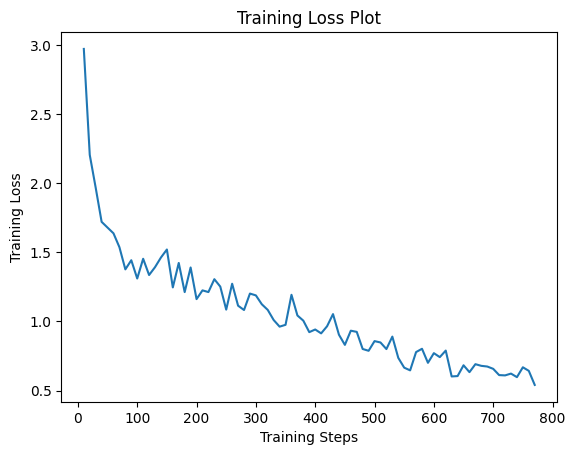

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

training_logs = trainer.state.log_history

loss = []
step = []
for i, log in enumerate(training_logs):
  if (i + 1) % len(training_logs) == 0:
    break
  else:
    loss.append(log['loss'])
    step.append(log['step'])

# print(step)
# print(loss)

# Plot the loss
plt.plot(step, loss)
plt.xlabel("Training Steps")
plt.ylabel("Training Loss")
plt.title("Training Loss Plot")
plt.show()